In [1]:

from xenopict import Xenopict, magic
from rdkit import Chem
import rdkit.Chem.rdPartialCharges

import numpy as np


diclofenac = mol = Xenopict('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
rdkit.Chem.rdPartialCharges.ComputeGasteigerCharges(mol.mol)
shading = np.array([a.GetDoubleProp("_GasteigerCharge")  for a in mol.GetAtoms()])
shading = shading / abs(shading).max()  # partial charge (scaled to [-1, 1])



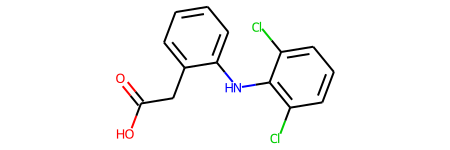

In [2]:
# Atom shading 
drawer = Xenopict(mol)
drawer.shade(shading)
drawer.halo()

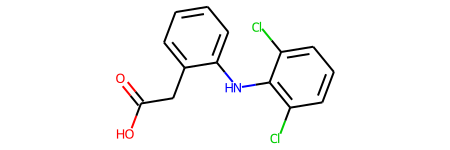

In [3]:
Xenopict(mol).shade(shading).halo()

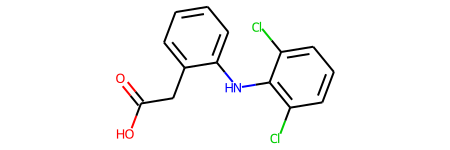

In [4]:
a1 = [b.GetBeginAtomIdx() for b in mol.GetBonds()]
a2 = [b.GetEndAtomIdx() for b in mol.GetBonds()]
bshading = (shading[a1] + shading[a2])  / 2

# Bond shading
drawer = Xenopict(mol)
drawer.shade(bond_shading=(a1, a2, bshading)).halo()

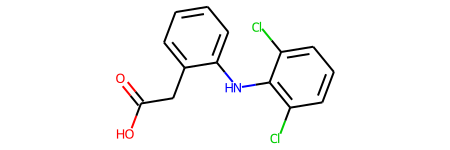

In [5]:
# Atom and bond shading togetehr
drawer = Xenopict(mol)
drawer.shade(shading, bond_shading=(a1, a2, bshading))
drawer.halo()

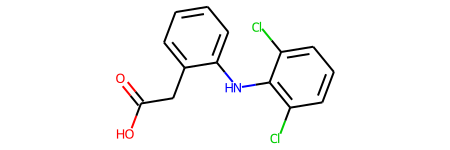

In [6]:
# Mark substructures (defined as a list of atom IDs)
drawer.mark_substructure([0,1,2,3, 10])

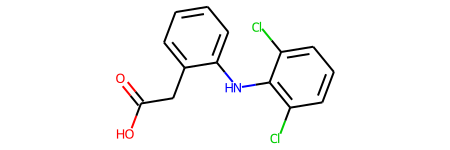

In [7]:
# Shade substructures
drawer = Xenopict(mol)
drawer.shade_substructure([[0,1,2,3], [7,8,9,10], [3,4,5,9]], [1, -0.65, 0.6])
drawer.halo()


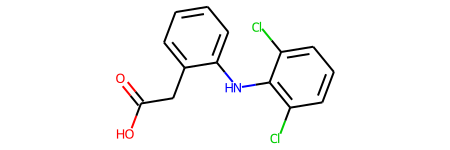

In [8]:
# Another one of the xenosite colormaps
Xenopict(mol, cmap="xenosite_pwo").shade(shading).halo()

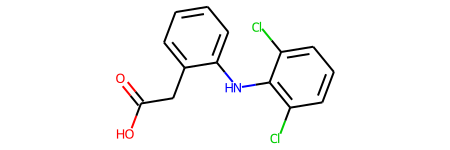

In [9]:
# any matplotlib colormap works, but most won't look as good as the default
Xenopict(mol, cmap="RdBu").shade(shading).halo()

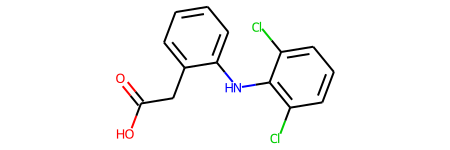

In [10]:
# depeict a substructure
drawer = Xenopict(mol)
drawer.substructure_focus([0,1,2,3])

In [11]:
#get the SVG
svg = drawer.to_svg()
print(svg)

<?xml version="1.0" ?><svg xmlns="http://www.w3.org/2000/svg" xmlns:rdkit="http://www.rdkit.org/xml" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" baseProfile="full" xml:space="preserve" width="108.6" height="111.3" viewBox="17.6 63.0 108.6 111.3"><g class="shading"/><g class="mol_halo"/><g class="lines" style="fill-rule:evenodd;stroke:#000000;stroke-width:1;stroke-opacity:1;stroke-linecap:round;stroke-linejoin:round"><path class="bond-0 atom-0 atom-1" d="M 54.4,96.5 L 68.9,114.3"/><path class="bond-0 atom-0 atom-1" d="M 49.7,100.3 L 64.3,118.1"/><path class="bond-1 atom-1 atom-2" d="M 66.6,116.2 L 58.0,139.0"/><path class="bond-2 atom-1 atom-3" d="M 66.6,116.2 L 96.2,111.4"/></g><g class="text"><path class="atom-0" d="M 43.7 93.0 Q 43.7 91.0, 44.7 89.8 Q 45.7 88.7, 47.6 88.7 Q 49.5 88.7, 50.5 89.8 Q 51.5 91.0, 51.5 93.0 Q 51.5 95.1, 50.5 96.3 Q 49.5 97.4, 47.6 97.4 Q 45.8 97.4, 44.7 96.3 Q 43.7 95.1, 43.7 93.0 M 47.6 96.5 Q 48.9 96.5, 49.6 95.6 Q 50.3 94.7, 50.3 93.0 Q 50.3

In [ ]:
from rdkit.Chem import PandasTools

In [ ]:
from rdkit.Chem import

In [ ]:
import pandas as pd
PandasTools.InstallPandasTools()


In [ ]:
df = pd.DataFrame.from_records([["O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl"],[ "CCC"]], columns=["Smiles"])
df

NameError: name 'pd' is not defined

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df)

df._repr_html_()

'<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Smiles</th>\n      <th>ROMol</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl</td>\n      <td style="text-align: center;"><img data=\'xenopict\' data-content=\'rdkit/molecule\' style=\'background:white;width:100%\' src=\'data:image/svg+xml;utf8,%3C%3Fxml%20version%3D%221.0%22%20%3F%3E%3Csvg%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Ardkit%3D%22http%3A//www.rdkit.org/xml%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%20version%3D%221.1%22%20baseProfile%3D%22full%22%20xml%3Aspace%3D%22preserve%22%20width%3D%22288px%22%20height%3D%22180px%22%20viewBox

In [ ]:
print(mol._repr_svg_())

None


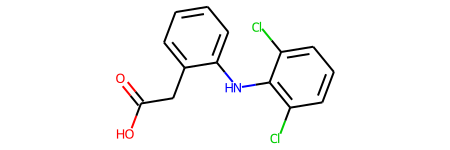

In [ ]:
mol

In [ ]:
%load_ext xenopict

/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite_bwr' which already exists.
  cm.register_cmap(name, cmap)
/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite' which already exists.
  cm.register_cmap(name, cmap)
/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite_gwp' which already exists.
  cm.register_cmap(name, cmap)
/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite_pwo' which already exists.
  cm.register_cmap(name, cmap)


In [ ]:
from rdkit.Chem import PandasTools

In [ ]:
drawer.svgdom.firstChild.tagName

'svg'

In [ ]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [ ]:
%lsmagic

Available line magics:
%aimport  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autoreload  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xenopict  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%ma

In [ ]:
test

['LICENSE',
 'Makefile',
 'README.md',
 '__pycache__',
 'build',
 'dist',
 'docs',
 'notebook',
 'output.svg.pdf',
 'setup.py',
 'test.ipynb',
 'test.py',
 'xenopict',
 'xenopict.egg-info']